# "Common" not failing glacier volume evolution until 2300
**-> a more up-to-date version of the analysis is inside of: https://nbviewer.org/urls/cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/oggm-standard-projections-csv-files/notebooks/analyse_csv_files_1.6.1.ipynb**


In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

cfg.initialize()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)
import geopandas as gpd

2023-08-22 10:05:53: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-08-22 10:05:53: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-08-22 10:05:53: oggm.cfg: Multiprocessing: using all available processors (N=32)
2023-08-22 10:05:53: oggm.utils: Checking the download verification file checksum...


In [2]:
d_reg_num_name = {}
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard and Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus and Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['19'] = 'Antarctic and Subantarctic'

In [8]:
gcms_cmip6_2300 = pd.read_csv('/home/www/oggm/oggm-standard-projections/analysis_notebooks/all_gcm_list_2300_vJul2023.csv', index_col=0)   
gcms_ssps_2300 = []
for ind in gcms_cmip6_2300.loc[gcms_cmip6_2300['var']=='pr'].index:
    gcms_ssps_2300.append(f'{gcms_cmip6_2300.loc[ind].gcm}_{gcms_cmip6_2300.loc[ind].ssp}')

In [3]:
bc = '_bc_2000_2019'
cmip='CMIP6'
df_scenario_cmip6_2300 = xr.open_dataset(f'volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr2300.nc')
df_scenario = xr.open_dataset(f'volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr2100.nc')
# they sohuld be the same, as we chose the same amount of glaciers!!!
np.testing.assert_allclose(df_scenario_cmip6_2300.volume.sel(time=slice(2000,2100)), df_scenario.sel(gcm_scenario=df_scenario_cmip6_2300.gcm_scenario).volume)

pd_t = (100*df_scenario_cmip6_2300.sum(dim='rgi_reg').volume.sel(time=2100)/df_scenario_cmip6_2300.volume.sum(dim='rgi_reg').isel(time=0)).isel(hist=-1).to_dataframe('volume_rel')
pd_t.reset_index().groupby('scenario').median()



calendar_month  n_all_running_rgis  volume_rel
scenario                                                   
ssp126                  1.0            208597.0   61.335274
ssp534-over             1.0            208597.0   54.882156
ssp585                  1.0            208597.0   36.941730

In [4]:
bc = '_bc_2000_2019'
endyr=2100
cmip='CMIP6'
df_scenario = xr.open_dataset(f'volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr{endyr}.nc')
pd_t = (100*df_scenario.sum(dim='rgi_reg').volume.sel(time=2100)/df_scenario.volume.sum(dim='rgi_reg').isel(time=0)).isel(hist=-1).to_dataframe('volume_rel')
pd_t.reset_index().groupby('scenario').median()

calendar_month  n_all_running_rgis  volume_rel
scenario                                                   
ssp119                  1.0            208597.0   72.612976
ssp126                  1.0            208597.0   65.140137
ssp245                  1.0            208597.0   61.089912
ssp370                  1.0            208597.0   53.832573
ssp434                  1.0            208597.0   58.077835
ssp460                  1.0            208597.0   53.990623
ssp534-over             1.0            208597.0   54.882156
ssp585                  1.0            208597.0   40.148476

In [9]:
df_scenario_gcm_2300 = df_scenario.sel(gcm_scenario=gcms_ssps_2300)
pd_t_2300 = (100*df_scenario_gcm_2300.sum(dim='rgi_reg').volume.sel(time=2100)/df_scenario_gcm_2300.volume.sum(dim='rgi_reg').isel(time=0)).isel(hist=-1).to_dataframe('volume_rel')
pd_t_2300.reset_index().groupby('scenario').median()

calendar_month  n_all_running_rgis  volume_rel
scenario                                                   
ssp126                  1.0            208597.0   61.335274
ssp534-over             1.0            208597.0   54.882156
ssp585                  1.0            208597.0   36.941730

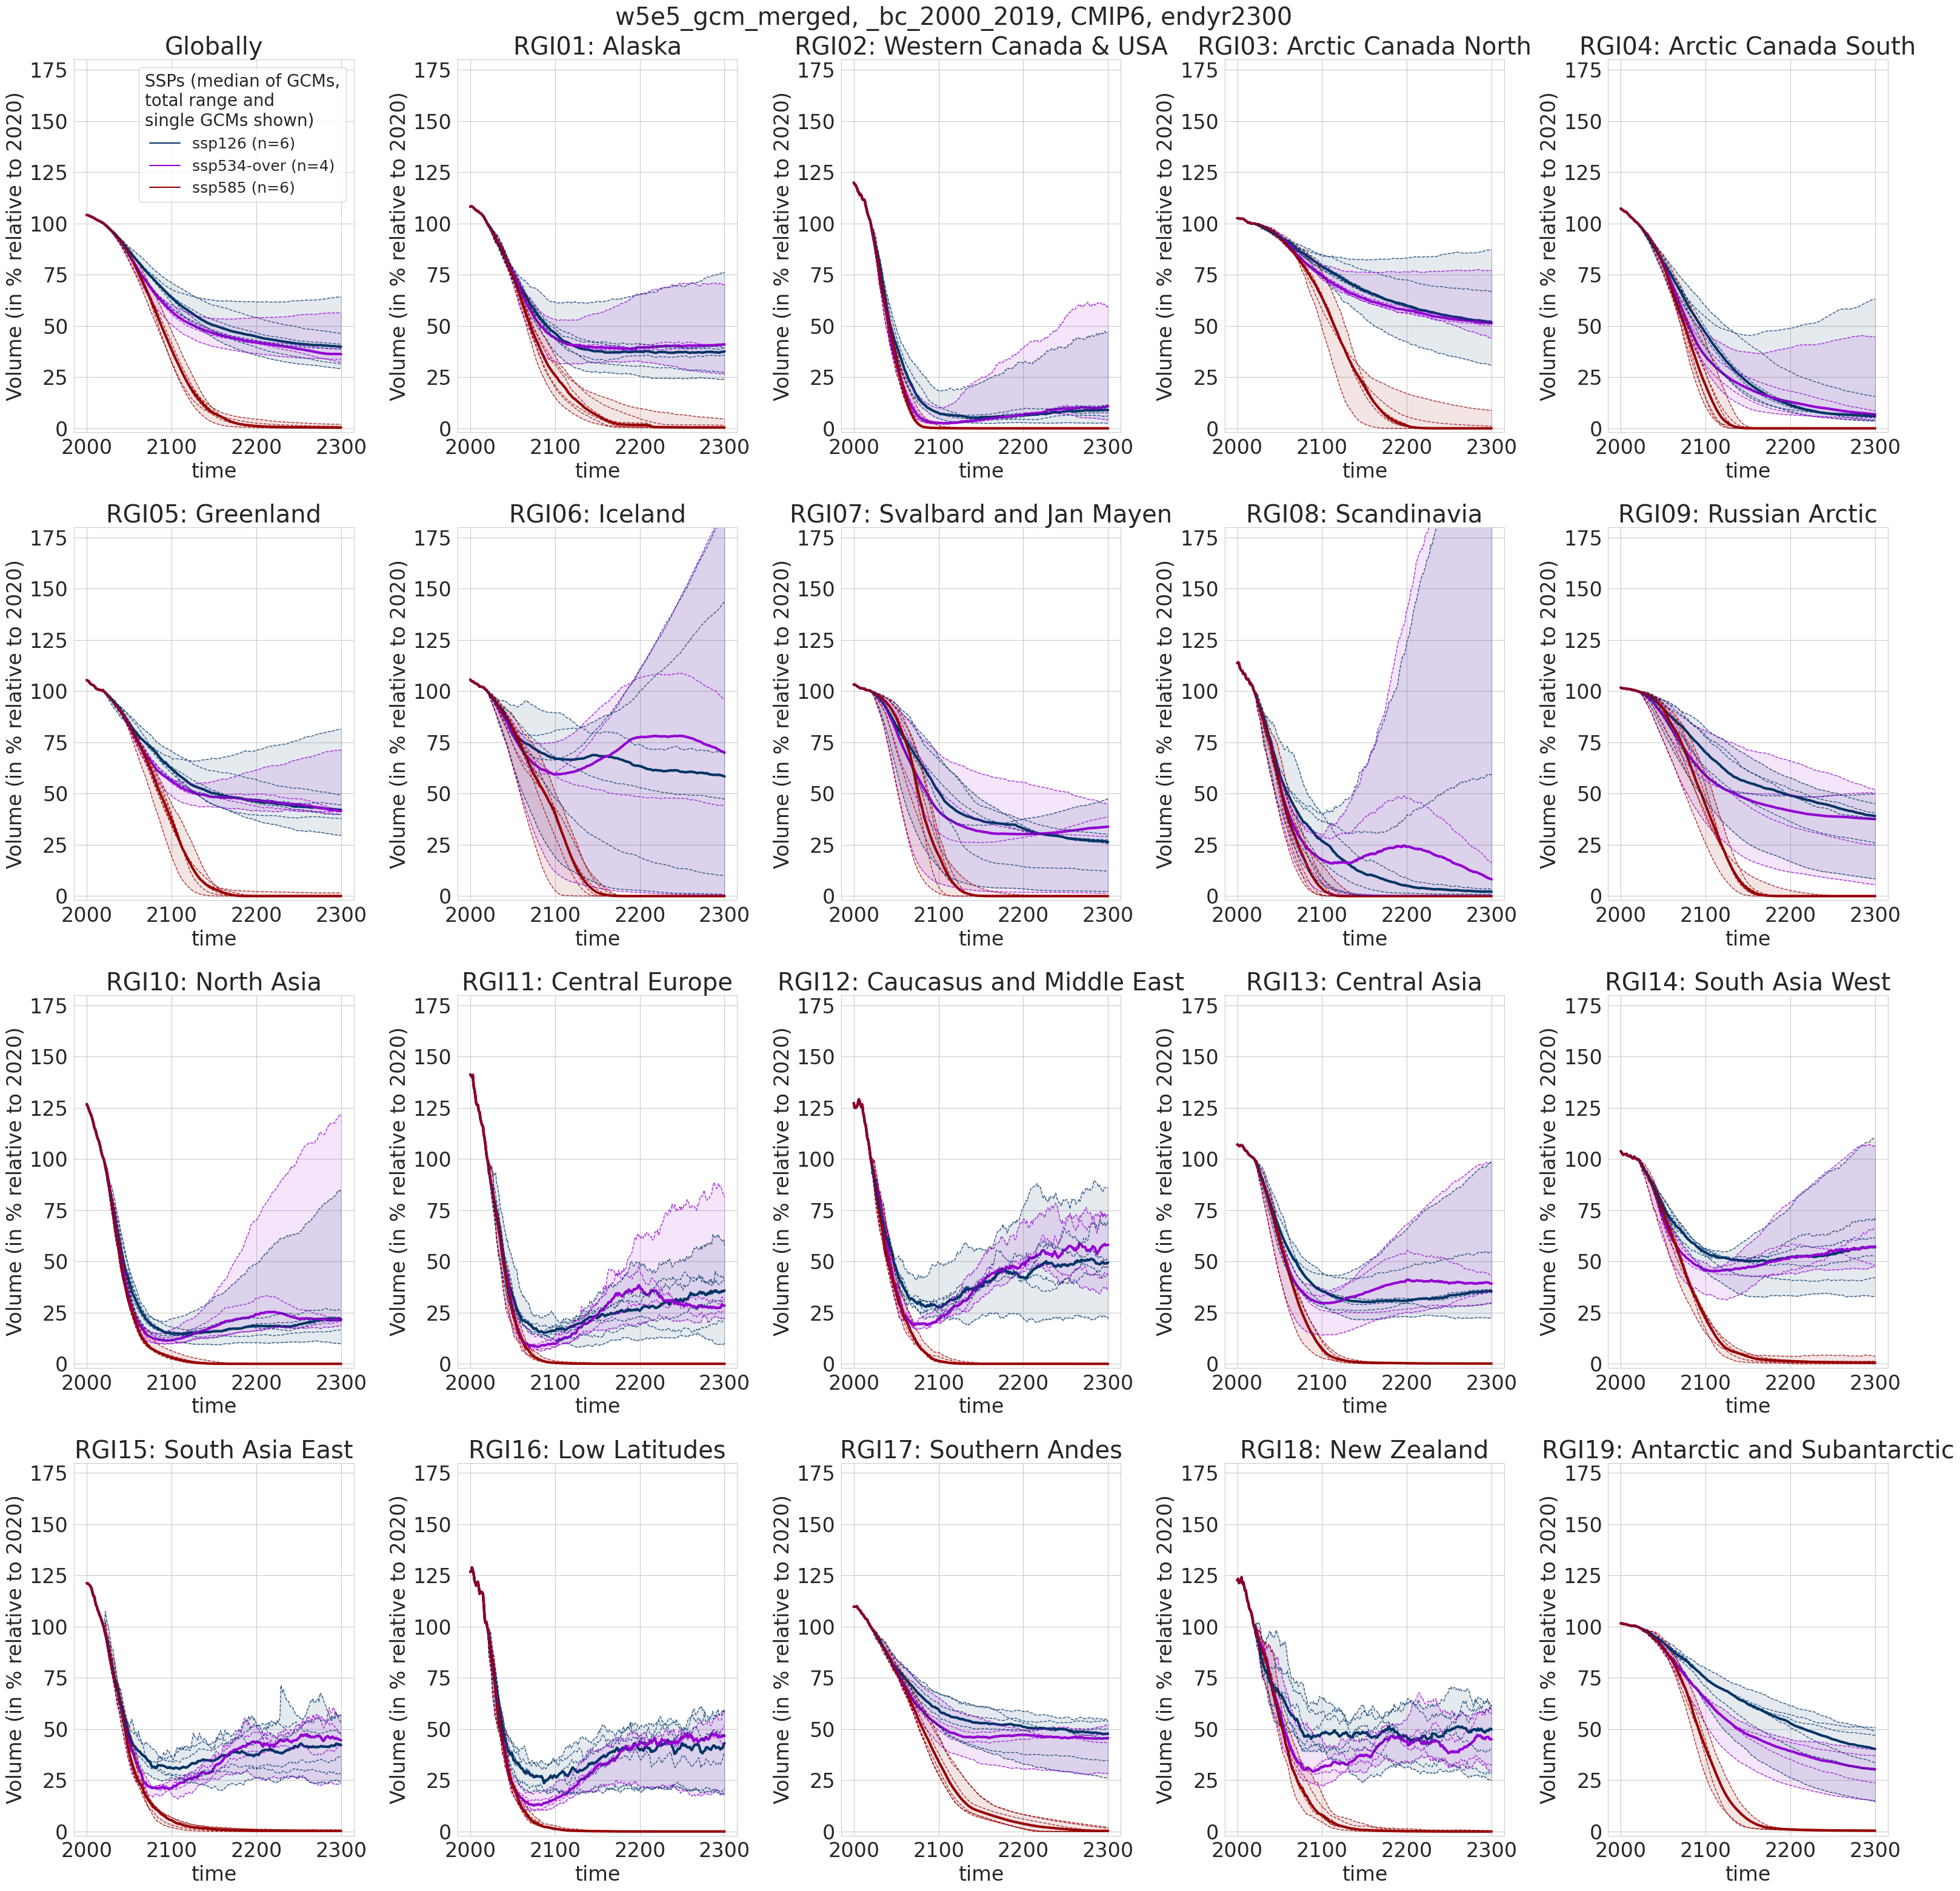

In [6]:
cmip='CMIP6'
endyr='2300'
hist = 'w5e5_gcm_merged'
bc  = '_bc_2000_2019' #'_bc_2000_2019'

df_scenario = xr.open_dataset(f'volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr{endyr}.nc')
plt.rc('font', size=24)

plt.figure(figsize=(32,32)) #harey=True, sharex=True)
#plt.ylabel('Volume (in % relative to 2020)')
df_scenario_hist = df_scenario.sel(hist=hist)

for j,r in enumerate(['Global', 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]):
    plt.subplot(4,5,j+1)

    if r == 'Global':
        rgi_reg = r
        df_scenario_sel = df_scenario_hist.sum(dim='rgi_reg') #=f'{r}.02f')
    else:
        rgi_reg = f'{r:02}'
        df_scenario_sel = df_scenario_hist.sel(rgi_reg=rgi_reg)
        
    df_scenario_sel_rel = 100*df_scenario_sel.volume/df_scenario_sel.volume.sel(time=2020)
    pd_scenario_sel_rel = df_scenario_sel_rel.to_dataframe('volume_rel_2020_%')
    pd_scenario_sel_rel = pd_scenario_sel_rel.reset_index()

    hue_order = ['ssp126', 'ssp534-over', 'ssp585'] #'ssp119',
    colors_ssp = ['#003466', 'darkviolet', '#980002'] 

    plt.ylabel('Volume (in % relative to 2020)')
    sns.lineplot(data=pd_scenario_sel_rel,
                 hue='scenario', x='time', y= 'volume_rel_2020_%', 
                 palette=colors_ssp,
                 estimator='median', errorbar=('pi',100),
                 err_kws= {'alpha':0.1},
                 ls = '-',
                 ##label',
                 #style = 'ssp',
                 #dashes=['', (5, 2, 1, 2), (5, 2, 1, 2), (5, 2, 1, 2),'','',''],
                 #style_order=scenarios,
                 hue_order=hue_order,
                 lw=3)
    if rgi_reg == 'Global':
        leg, han = plt.gca().get_legend_handles_labels()
        gcm_count = pd_scenario_sel_rel.loc[pd_scenario_sel_rel.time==2000].groupby('scenario').count()['gcm_scenario']
        han_2 = []
        for h in han:
            han_2.append(f'{h} (n={gcm_count[h]})')
        plt.legend(leg, han_2, title='SSPs (median of GCMs,\ntotal range and \nsingle GCMs shown)', title_fontsize=20, fontsize=18)
    else:
        l = plt.legend()
        l.remove()
    for gcm in pd_scenario_sel_rel.gcm.unique():
        sns.lineplot(data=pd_scenario_sel_rel.loc[pd_scenario_sel_rel.gcm==gcm],
                     hue='scenario', x='time', y= 'volume_rel_2020_%', 
                     palette=colors_ssp,
                     #estimator='median', #errorbar=('pi',50),
                     ls = '--',
                     lw=1, 
                     alpha=0.8, 
                     ##label',
                     #style = 'ssp',
                     #dashes=['', (5, 2, 1, 2), (5, 2, 1, 2), (5, 2, 1, 2),'','',''],
                     #style_order=scenarios,
                     hue_order=hue_order,legend=False)
    #plt.legend([leg[0],leg[8]], [han[0],han[8]])
    
    #plt.title(f'RGI{rgi_reg}: {hist}, {bc}, {cmip}, endyr{endyr}')
    #plt.ylim([-2,102]);
    if rgi_reg == 'Global':
        plt.title(f'Globally')
    else:
        plt.title(f'RGI{rgi_reg}: {d_reg_num_name[rgi_reg]}')
    plt.ylim([-2,180]);
plt.suptitle(f'{hist}, {bc}, {cmip}, endyr{endyr}')
plt.tight_layout()
plt.savefig(f'volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr{endyr}.png')

- attention: the signal here could come from a few single glaciers (as an "overshoot" signal)